In [ ]:
'''
The following project is based on  'Freelance platform project dataset' 
the dataset is about the freelancers and their work with different categories .
The project is divided in 4 parts :
1.EDA 
2.Clustering of data of similar types .

Steps followed in the project:
Data Overview
1.Check for missing values.
2.Identify the data types of each feature.
3.Histograms and box plots for each numerical feature.
4.Frequency distribution for categorical features.
5.Detect outliers and anomalies.
6.Correlation between two features

Clustering:
*In machine learning, clustering is a type of unsupervised learning where the goal is to group 
similar data points together based on certain features or characteristics.The result of clustering is a set of clusters, 
each containing data points that are more similar to each other than to those in other clusters. The algorithm doesn't 
have prior knowledge about the labels or classes of the data; it groups the data based on inherent patterns or similarities.

*Using K means model and Elbowmethod the two features 'Title and 'Category Names' are used to cluster similar categories of
freelance work togetherin one scatter plot.

Data Preprocessing
1.Handle missing values using imputation or removal.
2.Encode categorical variables.
3.Scale or normalize numerical features.
4.Split the data into training and testing sets.

 Model Selection for Regression
 The regression is done to predict 'Budget' as target column
1.Choosing a ridge regression model as the data is overfitting
2.Evaluate the model on the testing dataset.
Metrics: Mean Squared Error (MSE), mean absolute error .
Visualize actual vs. predicted values.
"""



In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('Freelance Platform Projects.csv')#reading Freelancer Platform Project.csv file from file path
df.head(40)

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer
5,Content Database Project for Travel Company,Technology & Programming,Expert ($$$),Databases,EUR,500.0,remote,ALL,fixed_price,2023-04-29 17:08:46,Brief\nThe requirements of this brief is to fi...,NaN,2013-09-14,Dubai,United Arab Emirates,EUR,Brand & eCommerce Consultant
6,Make web site for Tutoring company,Design,Entry ($),Web Design,USD,10.0,remote,ALL,fixed_price,2023-04-29 16:51:40,I need to build web site for my tutoring compa...,1 - 2 weeks,2023-04-27,London,United Kingdom,USD,NaN
7,Seeking Highly Skilled Freelancers,Technology & Programming,Entry ($),Website Development,GBP,10.0,remote,ALL,fixed_price,2023-04-29 16:11:02,I am currently working on a new freelancer com...,NaN,2010-12-20,London,United Kingdom,GBP,Lead Developer at WPSmart.co.uk
8,E-learning,Design,Intermediate ($$),Illustration & Drawing,GBP,0.0,remote,ALL,fixed_price,2023-04-29 16:06:36,Looking for a quote for an introductory e-lear...,NaN,2022-07-07,Glasgow,United Kingdom,GBP,NaN
9,19 sentences recording. native english speaker...,Music & Audio,Entry ($),Voice-Over,USD,10.0,remote,ALL,fixed_price,2023-04-29 15:50:21,1. need native speaker from US or UK or CA\n2...,NaN,2019-05-30,Sydney,Australia,GBP,NaN


# EXPLORATORY DATA ANALYSIS (EDA)

In [2]:
df.shape# Number of rows and columns i.e 12222 rows and 17 columns

(12222, 17)

In [3]:
df.columns #returns names of columns in the dataset

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Location', 'Freelancer Preferred From', 'Type',
       'Date Posted', 'Description', 'Duration', 'Client Registration Date',
       'Client City', 'Client Country', 'Client Currency', 'Client Job Title'],
      dtype='object')

In [4]:
df.info()#gives names of total number of rows and columns along with datatypes of each column and
#memory occupied non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      12222 non-null  object 
 1   Category Name              12222 non-null  object 
 2   Experience                 12222 non-null  object 
 3   Sub Category Name          12222 non-null  object 
 4   Currency                   12222 non-null  object 
 5   Budget                     12222 non-null  float64
 6   Location                   12222 non-null  object 
 7   Freelancer Preferred From  12222 non-null  object 
 8   Type                       12222 non-null  object 
 9   Date Posted                12222 non-null  object 
 10  Description                12222 non-null  object 
 11  Duration                   1602 non-null   object 
 12  Client Registration Date   12222 non-null  object 
 13  Client City                12222 non-null  obj

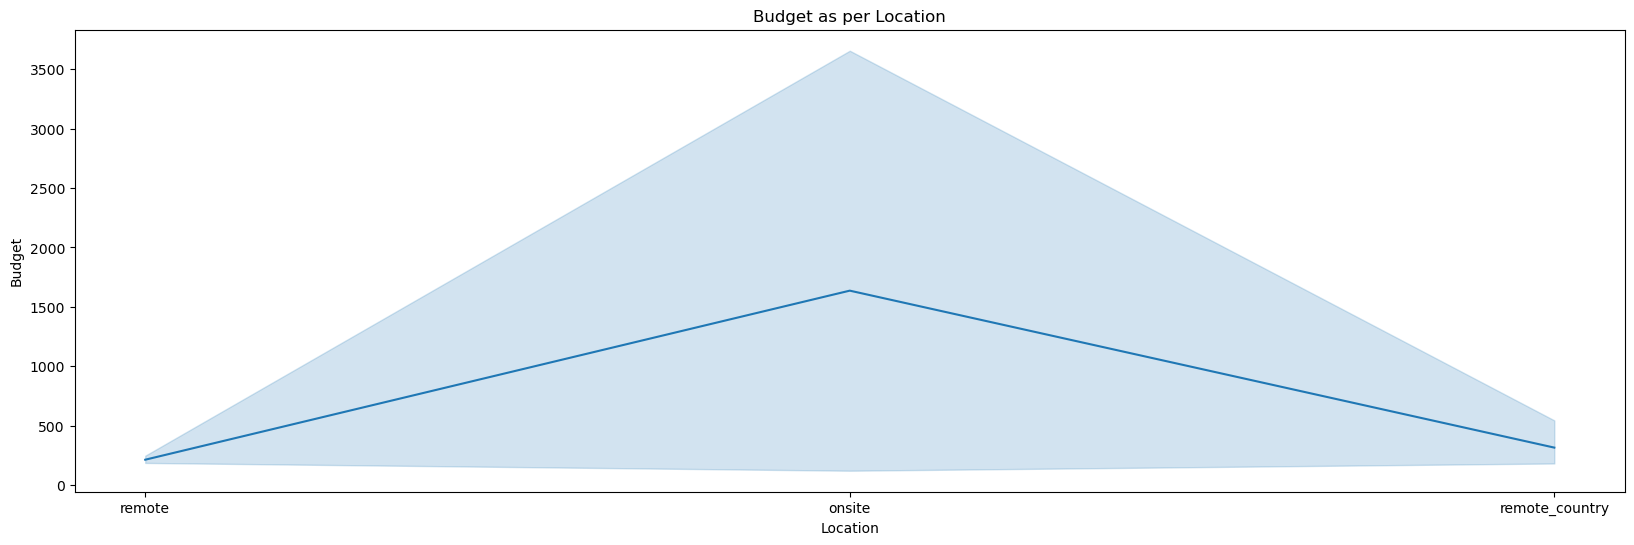

In [5]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df,x='Location',y='Budget')
plt.title('Budget as per Location')
plt.show()

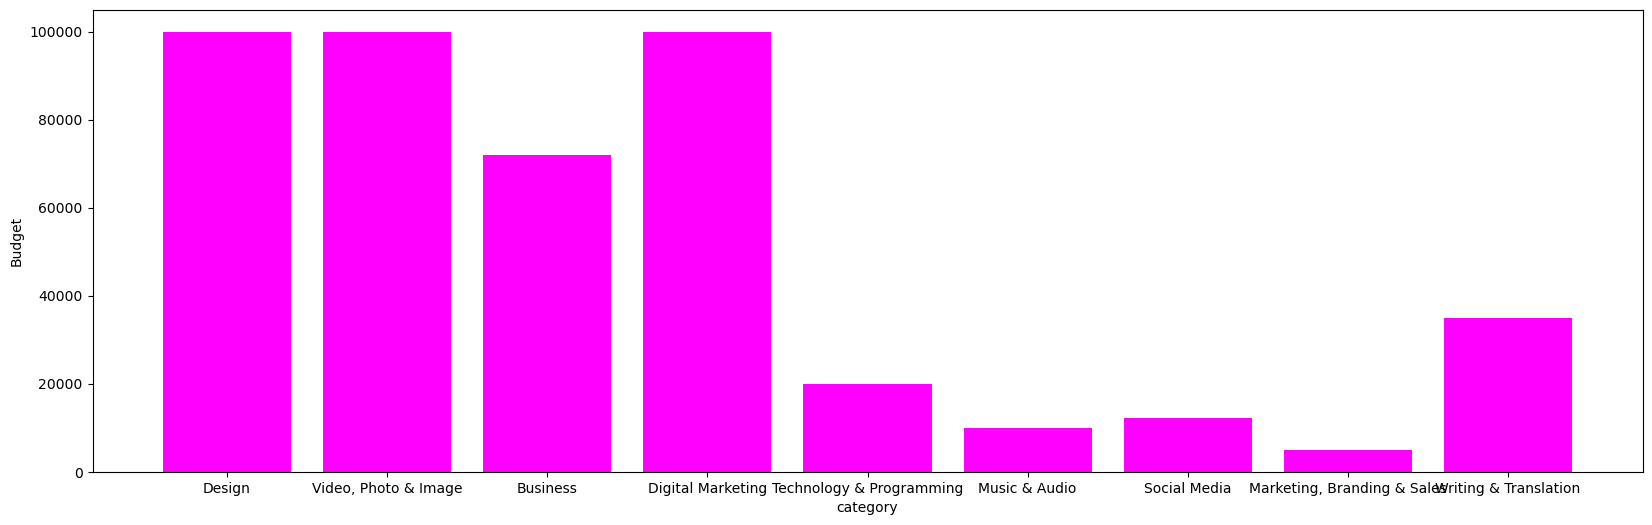

In [6]:
x=df['Category Name']
y=df['Budget']

plt.figure(figsize=(20,6))
plt.bar(x,y,color=['magenta'])
plt.xlabel('category')
plt.ylabel('Budget')
plt.show()

Text(0, 0.5, 'category name')

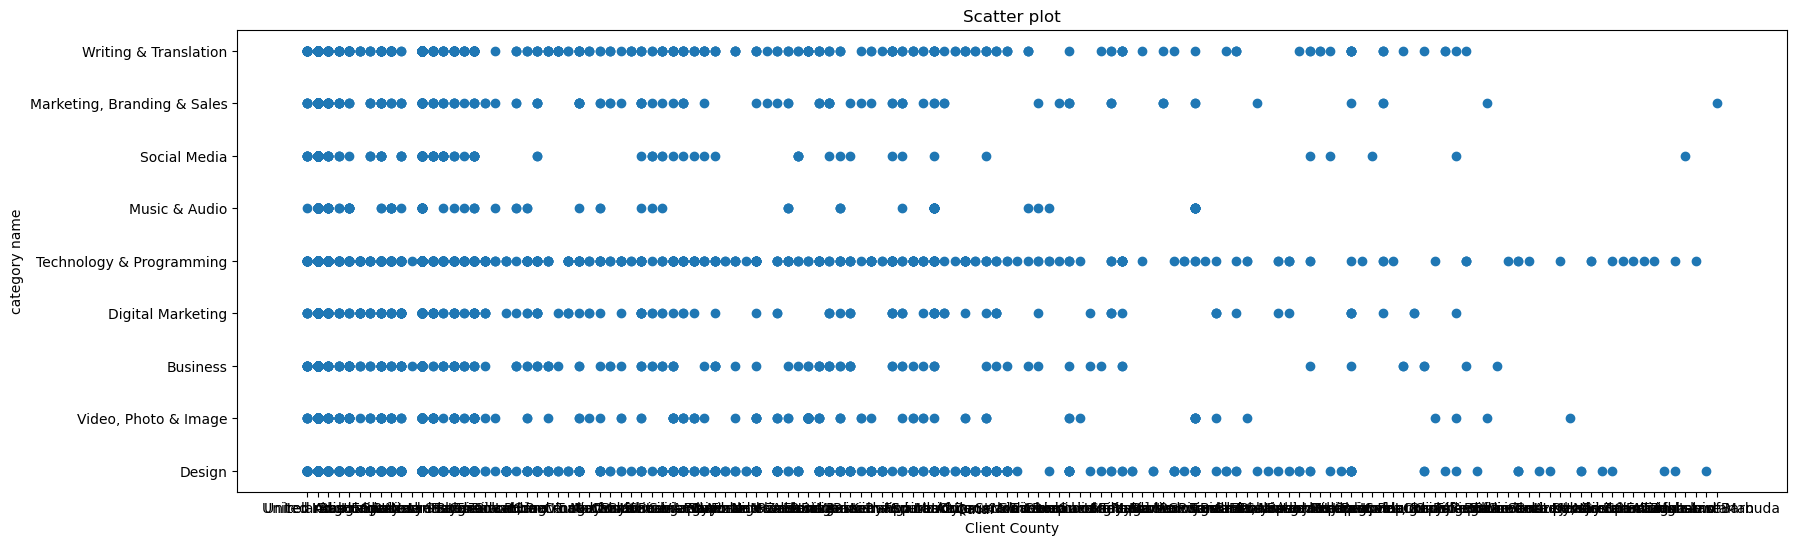

In [7]:
z=df['Client Country']
plt.figure(figsize=(20,6))
plt.scatter(z,x)
plt.title('Scatter plot')
plt.xlabel('Client County')
plt.ylabel('category name')

In [8]:
df.info(['Category Names'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      12222 non-null  object 
 1   Category Name              12222 non-null  object 
 2   Experience                 12222 non-null  object 
 3   Sub Category Name          12222 non-null  object 
 4   Currency                   12222 non-null  object 
 5   Budget                     12222 non-null  float64
 6   Location                   12222 non-null  object 
 7   Freelancer Preferred From  12222 non-null  object 
 8   Type                       12222 non-null  object 
 9   Date Posted                12222 non-null  object 
 10  Description                12222 non-null  object 
 11  Duration                   1602 non-null   object 
 12  Client Registration Date   12222 non-null  object 
 13  Client City                12222 non-null  obj

# Encoding object type columns

In [9]:
obj_cols=df.select_dtypes('object').columns
obj_cols#variable assigned to store all columns with object datatype

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Location', 'Freelancer Preferred From', 'Type', 'Date Posted',
       'Description', 'Duration', 'Client Registration Date', 'Client City',
       'Client Country', 'Client Currency', 'Client Job Title'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder#converted object datatype into integer

for col in obj_cols:#assigning a loopso that all columns in obj_col will be encoded using fit transform action
    encoder=LabelEncoder()
    df[col]=encoder.fit_transform(df[col])

df.dtypes

Title                          int32
Category Name                  int32
Experience                     int32
Sub Category Name              int32
Currency                       int32
Budget                       float64
Location                       int32
Freelancer Preferred From      int32
Type                           int32
Date Posted                    int32
Description                    int32
Duration                       int32
Client Registration Date       int32
Client City                    int32
Client Country                 int32
Client Currency                int32
Client Job Title               int32
dtype: object

In [11]:
df.isnull().sum()#returns total numbeer of null values in each column

Title                        0
Category Name                0
Experience                   0
Sub Category Name            0
Currency                     0
Budget                       0
Location                     0
Freelancer Preferred From    0
Type                         0
Date Posted                  0
Description                  0
Duration                     0
Client Registration Date     0
Client City                  0
Client Country               0
Client Currency              0
Client Job Title             0
dtype: int64

# Handling Outliers

<Axes: >

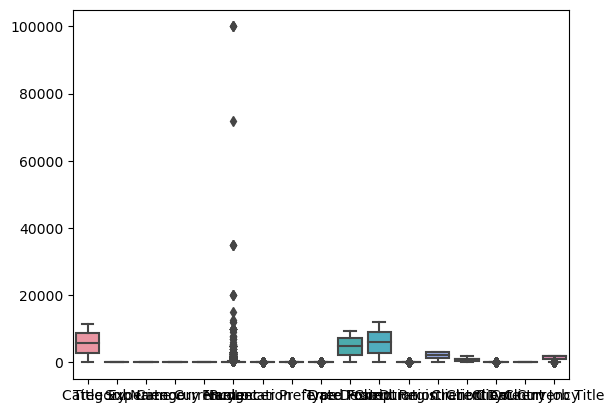

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df)#plotting box plot to check outliers in dataset


<Axes: >

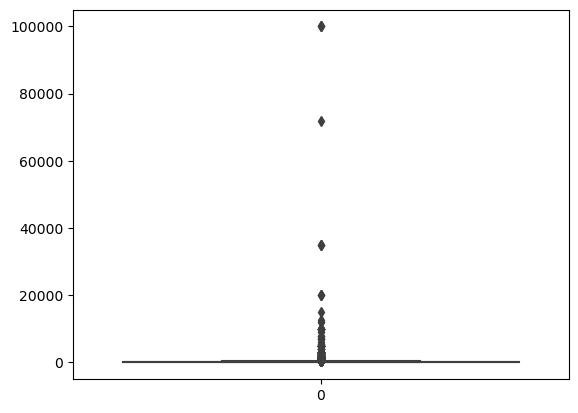

In [13]:
sns.boxplot(df['Budget'])#plotting box plot to check outliers in Budget column

In [14]:
df['Budget'].skew()

42.455398395555996

In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
result=scaler.fit_transform(df[['Budget']])
result[:5]

array([[-0.08933429],
       [-0.11045083],
       [-0.11467414],
       [-0.11361831],
       [ 5.15812506]])

In [16]:
#Defining remove outlier function
def remove_outliers(col):
    sorted(col)
    q1,q2=col.quantile([0.25,0.75])
    IQR=q2-q1
    lwr_bound=q1-(1.5*IQR)
    upp_bound=q2+(1.5*IQR)
    return lwr_bound,upp_bound

In [17]:
low,high=remove_outliers(df['Budget'])

In [18]:
df['Budget']=np.where(df['Budget']>high,high,df['Budget'])

In [19]:
df['Budget']=np.where(df['Budget']<low,low,df['Budget'])

<Axes: >

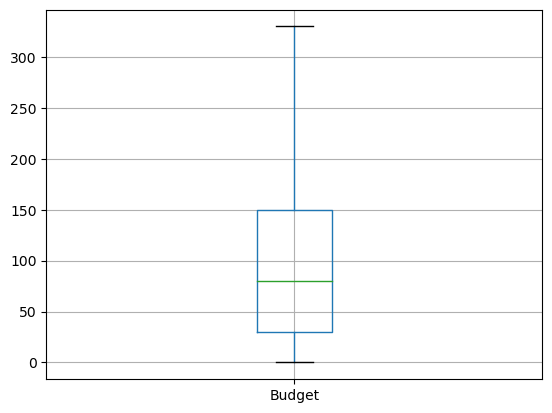

In [20]:
df.boxplot(column='Budget')

In [21]:
df['Budget'].skew()#skewness recuced after removing outliers

1.091012222877877

In [22]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
result=scaler.fit_transform(df[['Budget']])
result[:5]

array([[-0.50239086],
       [-0.89475229],
       [-0.97322458],
       [-0.95360651],
       [ 2.14604883]])

# Creating Clusters of Similar projects

In [23]:
x=df[['Title','Category Name']]#Selecting two features for  Clustering
x

,Title,Category Name
0,969,1
1,6377,7
2,1108,0
3,467,0
4,3859,2
...,...,...
12217,7958,8
12218,8803,1
12219,8927,6
12220,2057,1


In [24]:
from sklearn.cluster import KMeans
#Elbow method
wcss_list=[]#creating empty list to store wcss values

for i in range(1,11):#giving range to create no.of cluster in range 1 to 10

    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss=model.inertia_#inertia is an attribute in Kmeans 
    wcss_list.append(wcss)
    
wcss_list

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[136396892152.68878,
 34380677816.0282,
 15093698881.14943,
 8570416150.747227,
 5452416601.661423,
 3822009756.5142155,
 2774866736.8597302,
 2138046843.5230365,
 1680149682.5362554,
 1374630142.5749125]

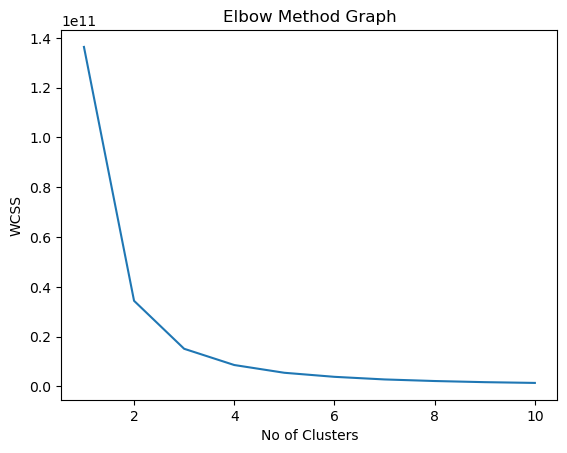

In [25]:
plt.plot(range(1,11),wcss_list)
plt.title('Elbow Method Graph')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans=KMeans(n_clusters=5)#From the above plotted elbow method we can have 5 clusters for our entire dataset
kmeans.fit(x)
pred=kmeans.predict(x)
pred[:5]

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 4, 2, 2, 1])

In [27]:
kmeans.cluster_centers_#calculating cluster centres

array([[8.08645193e+03, 3.81176471e+00],
       [3.41553958e+03, 3.56775798e+00],
       [1.12743352e+03, 3.59856480e+00],
       [1.04112106e+04, 4.11519806e+00],
       [5.74572931e+03, 3.46541383e+00]])

In [28]:
x.head()

,Title,Category Name
0,969,1
1,6377,7
2,1108,0
3,467,0
4,3859,2


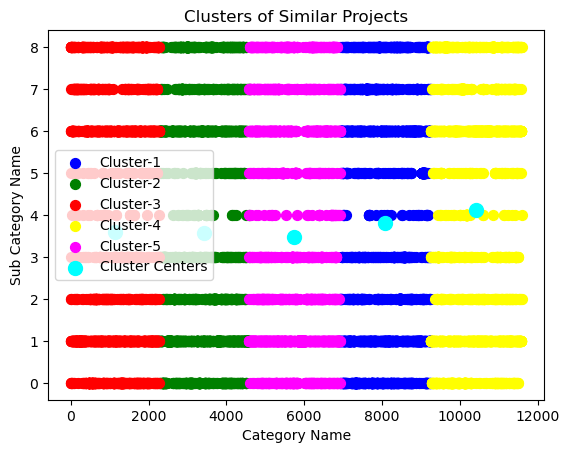

In [29]:
plt.scatter(x.iloc[pred==0,0],x.iloc[pred==0,1],s=50,c='blue',label='Cluster-1')#plotting scatter plot to visualise clusters
plt.scatter(x.iloc[pred==1,0],x.iloc[pred==1,1],s=50,c='green',label='Cluster-2')
plt.scatter(x.iloc[pred==2,0],x.iloc[pred==2,1],s=50,c='red',label='Cluster-3')
plt.scatter(x.iloc[pred==3,0],x.iloc[pred==3,1],s=50,c='yellow',label='Cluster-4')
plt.scatter(x.iloc[pred==4,0],x.iloc[pred==4,1],s=50,c='magenta',label='Cluster-5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s=100,c='cyan',label='Cluster Centers')
plt.title('Clusters of Similar Projects')
plt.xlabel('Category Name')
plt.ylabel('Sub Category Name')
plt.legend()
plt.show()

In [ ]:
t
